In [1]:
import sympy as smp
from IPython.display import HTML

## Fuente

In [2]:
HTML('https://ask.sagemath.org/question/7929/computing-variational-derivatives/')

,ALL UNANSWERED,,Ask Your Question


## Ejemplo 1

In [3]:
x, y = smp.symbols('x, y')

In [4]:
u = smp.Function('u')(x)
u

u(x)

In [18]:
L = u**3 + smp.diff(u)**2/2
L

u(x)**3 + Derivative(u(x), x)**2/2

In [19]:
t1 = smp.diff(L,u)
t1

3*u(x)**2

In [20]:
t2 = smp.diff(smp.diff(L,smp.diff(u,x)),x)
t2

Derivative(u(x), (x, 2))

In [21]:
d_I = t1 - t2 # etc...
d_I

3*u(x)**2 - Derivative(u(x), (x, 2))

In [63]:
# Generalizando...

def derivada_funcional(L,x,u,iteraciones=10):
    # TODO: Maximo orden que aparece apariciones_orden(L)
    d_I = 0
    uno = 1
    for i in range(iteraciones): # ordenes = [3,2,etc..]
        d_act = smp.diff(smp.diff(L,smp.diff(u,x,i)),x,i)
        if d_act == 0:
            break
        d_I += uno * d_act
        uno *= -1
    return d_I

def derivada_funcional_nesima(L,x,u,iteraciones=1):
    L_n = derivada_funcional(L,RHO,S)
    for i in range(iteraciones-1):
        L_n = derivada_funcional(L_n,RHO,S)
    return L_n
    

In [50]:
derivada_funcional(L,x,u,iteraciones)

Saliendo...


0

## Ejemplo 2

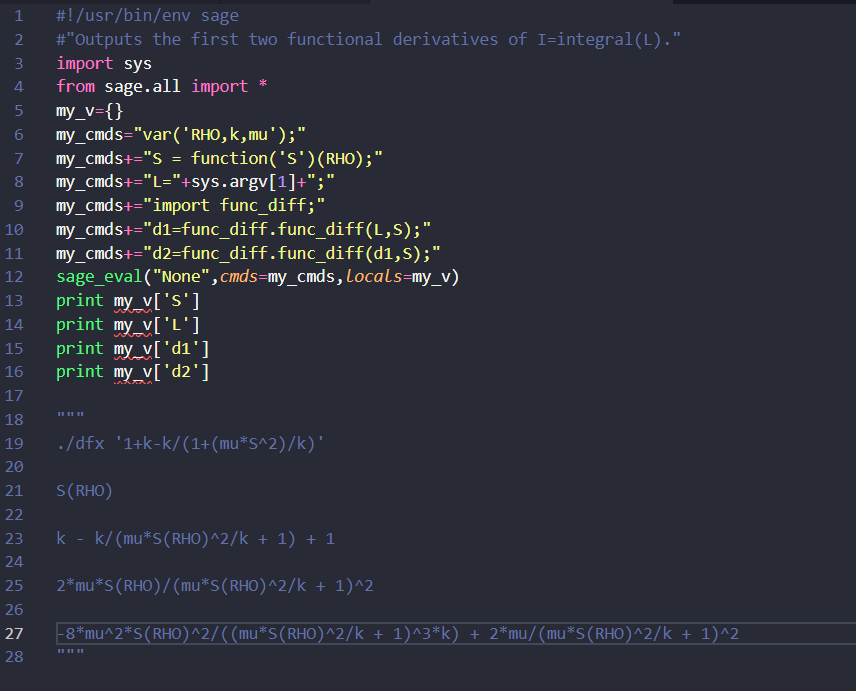

In [35]:
k, mu, RHO = smp.symbols('k, mu, RHO')

In [36]:
S = smp.Function('S')(RHO)
S

S(RHO)

In [64]:
L = 1 + k - (k / (1 +(mu*S**2)/k) )
L

k - k/(1 + mu*S(RHO)**2/k) + 1

In [58]:
L1 = derivada_funcional(L,RHO,S)
L1

Saliendo...


2*mu*S(RHO)/(1 + mu*S(RHO)**2/k)**2

In [59]:
L2 = derivada_funcional(L1,RHO,S)


Saliendo...


In [60]:
L2

2*mu/(1 + mu*S(RHO)**2/k)**2 - 8*mu**2*S(RHO)**2/(k*(1 + mu*S(RHO)**2/k)**3)

In [68]:
derivada_funcional_nesima(L,RHO,S,iteraciones=2)

Saliendo...
Saliendo...


2*mu/(1 + mu*S(RHO)**2/k)**2 - 8*mu**2*S(RHO)**2/(k*(1 + mu*S(RHO)**2/k)**3)